In [2]:
# Imports
import sys
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns



# Configs
%config InlineBackend.figure_format ='retina'
%matplotlib inline

# Cython
%load_ext Cython
#!python
#cython: language_level=3

print("All libraries set-up and ready to go!")

All libraries set-up and ready to go!


In [3]:
suffix = ''
k = pd.read_csv('../../pads/keystrokes-types' + suffix + '.csv', index_col=False, encoding='latin1')
w = pd.read_csv('../../pads/words' + suffix + '.csv', index_col=False)
s = pd.read_csv('../../pads/sentences' + suffix + '.csv', index_col=False)
f = pd.read_csv('../../pads/files' + suffix + '.csv', index_col=False)
u = pd.read_csv('../../pads/users' + suffix + '.csv', index_col=False)

# Part Of Speech

In [4]:
w.head(5) 

,Unnamed: 0,id,s_id,f_id,u_id,text,start_pos,end_pos,path,spell_err,word_freq,text_len,k_count,t,t/len,t/len_filter_2000,t/len_filter_10000,max_p,n_revisions,partofspeech
0,0,0,0,0,0,Learning,0,7,SS18/01894/1,0.0,0.000087,8.0,8.0,2784833.0,348104.125000,410.250000,1410.250000,2783551.0,0.0,VBG
1,1,1,0,0,0,Journal,8,15,SS18/01894/1,0.0,0.000055,7.0,8.0,1772.0,253.142857,253.142857,253.142857,502.0,0.0,NNP
2,2,2,0,0,0,The,19,22,SS18/01894/1,0.0,0.058900,3.0,4.0,6459.0,2153.000000,951.333333,2153.000000,5605.0,0.0,DT
3,3,3,0,0,0,second,23,29,SS18/01894/1,0.0,0.000437,6.0,19.0,6060.0,1010.000000,959.333333,1010.000000,2304.0,6.0,JJ
4,4,4,0,0,0,session,30,37,SS18/01894/1,0.0,0.000046,7.0,8.0,1280.0,182.857143,182.857143,182.857143,258.0,0.0,NN


In [5]:
w['partofspeech']= wps['partofspeech']

NameError: name 'wps' is not defined

In [ ]:
w.head(5)

In [6]:
posgroup = w.groupby(by = 'partofspeech')
pos_mean = posgroup['t/len_filter_10000'].mean()
pos_med = posgroup['t/len_filter_10000'].median()
print(pos_mean.sort_values())
print(pos_med.sort_values())

partofspeech
JJR      599.451083
VBN      603.906649
JJ       609.678490
NNS      613.211733
JJS      613.859581
VBG      641.041682
RBR      656.018323
NN       674.057778
VB       719.129947
MD       767.637250
VBD      818.139873
NNP      826.413559
RB       839.440176
PRP$     839.954231
VBP      845.861635
WDT      864.178961
UH       990.431373
CD      1013.008478
WP      1024.796596
VBZ     1087.313760
TO      1095.970915
CC      1134.317165
IN      1150.916273
POS     1339.562500
DT      1342.430584
WRB     1343.831527
WP$     1400.600000
PRP     1521.912696
SYM     1772.580965
EX      2290.526324
''      2830.747312
:       3315.509146
Name: t/len_filter_10000, dtype: float64
partofspeech
RBR      291.750000
JJS      294.000000
VB       295.000000
JJR      305.333333
VBN      319.500000
VBP      333.000000
MD       333.666667
VBG      334.250000
NNS      334.500000
JJ       336.500000
VBD      339.000000
NN       344.292857
PRP$     349.200000
RB       351.923077
WDT      368.

In [7]:
f[300:350]

,id,u_id,s_id_s,s_id_e,path,text
300,300,32.0,8720,8747,SS18/43b9b/9,In the 10th lecture we discussed how corpora c...
301,301,33.0,8748,8763,SS18/441b3/1,Learning Journal 1:\n\nIn the last lecture I h...
302,302,33.0,8764,8793,SS18/441b3/10,Learning Journal 10\n\nIn contrast to last wee...
303,303,33.0,8794,8821,SS18/441b3/11,Learning Journal 11\n\nIn the last lectures we...
304,304,33.0,8822,8850,SS18/441b3/12,Learning Journal 13\n\nIn the last lecture we ...
305,305,33.0,8851,8873,SS18/441b3/2,Learning Journal 2\n\nIn the past lecture we t...
306,306,33.0,8874,8895,SS18/441b3/3,"Learning Journal 3\n\nThe ""quantitive turn in ..."
307,307,33.0,8896,8920,SS18/441b3/5,Learning Journal 5\n\nIn the last lecture we h...
308,308,33.0,8921,8952,SS18/441b3/6,Learning Journal 6 \n\nIn the last lecture we ...
309,309,33.0,8953,8976,SS18/441b3/7,Learning Journal 7\n\nIn the last lecture we t...


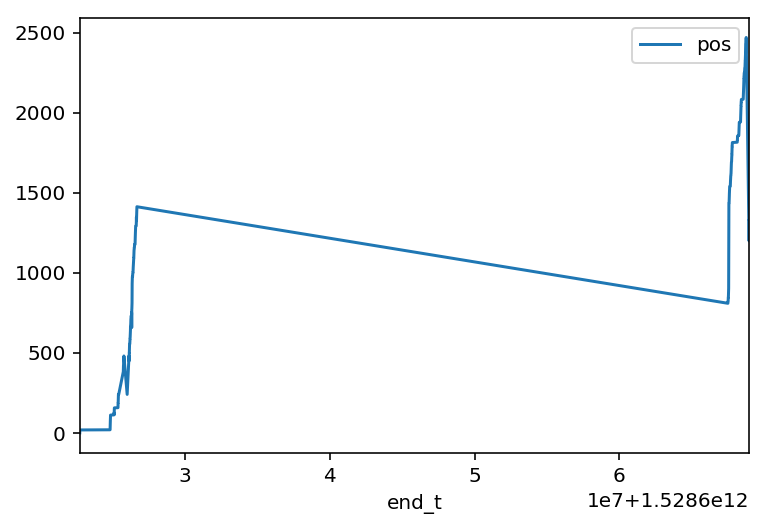

In [8]:
k[(k['s_id']>=10214)& (k['s_id']<=10236)].plot(x='end_t',y='pos')

In [20]:
# get keystrokes' position in text as list(n elements ranging from 0 to 1)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html
def get_pos_list(f_id,n):
    start_id = f.at[f_id,'s_id_s']
    end_id = f.at[f_id,'s_id_e']
    ks = k[(k['s_id']>=start_id)&(k['s_id']<=end_id)]
    ks_time = list(ks['t'].apply(lambda x: min(x, 10000)).cumsum())
    ks_time_normalized = list((ks_time-min(ks_time))/(max(ks_time)-min(ks_time)))
    ks_pos = list(ks['pos'])
    ks_pos_normalized = list((ks_pos-min(ks_pos))/(max(ks_pos)-min(ks_pos)))
    xvals = np.linspace(0, 1, num = n)
    yinterp = np.interp(x=xvals, xp=ks_time_normalized, fp=ks_pos_normalized)
    return yinterp

In [52]:
poslstavg = []
for uid in range(len(u)):
    poslstsum = np.zeros(100)
    for idx,fid in enumerate(list(f[f['u_id'] == uid]['id'])):
        poslstsum = poslstsum + get_pos_list(fid,100)
    poslstavg.append(poslstsum / (idx+1))

In [22]:
file_pos_list = []
for i in range(len(f)):
    pos_vec = get_pos_list(i,100)
    file_pos_list.append(pos_vec)
file_pos_mat = np.array(file_pos_list)

In [12]:
from scipy.cluster.vq import vq, kmeans, whiten

In [26]:
whitened = whiten(file_pos_mat)
patterns = kmeans(whitened,50)

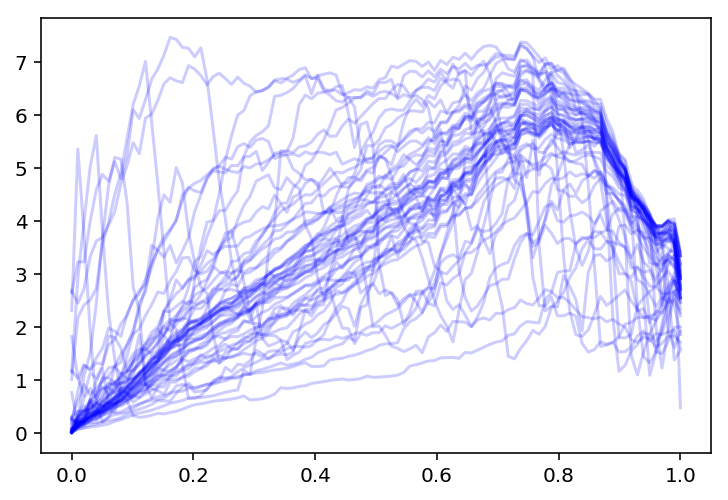

In [32]:
for i in range(50):
    plt.plot(np.linspace(0, 1, num = 100),patterns[0][i], color='b', alpha=0.2)

In [56]:
len(poslstavg[0])

100

In [79]:
poslstavgmat = np.array(poslstavg)
whitened2 = whiten(poslstavgmat)
uavg = kmeans(whitened2,10)

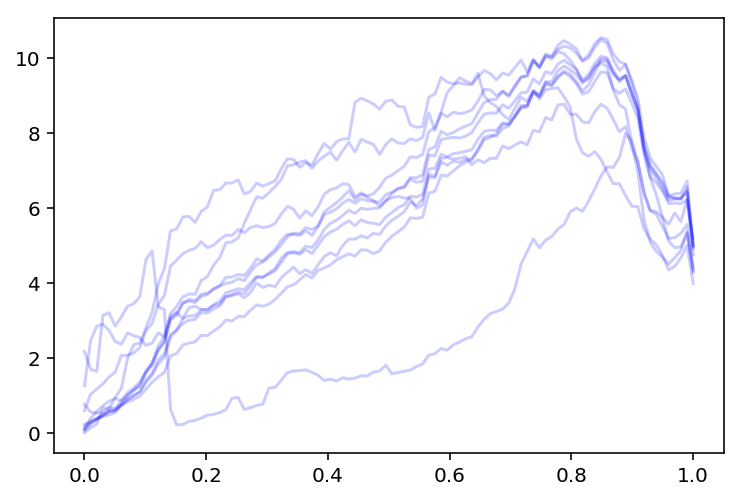

In [80]:
for i in range(10):
    plt.plot(np.linspace(0, 1, num = 100),uavg[0][i], color='b', alpha=0.2)

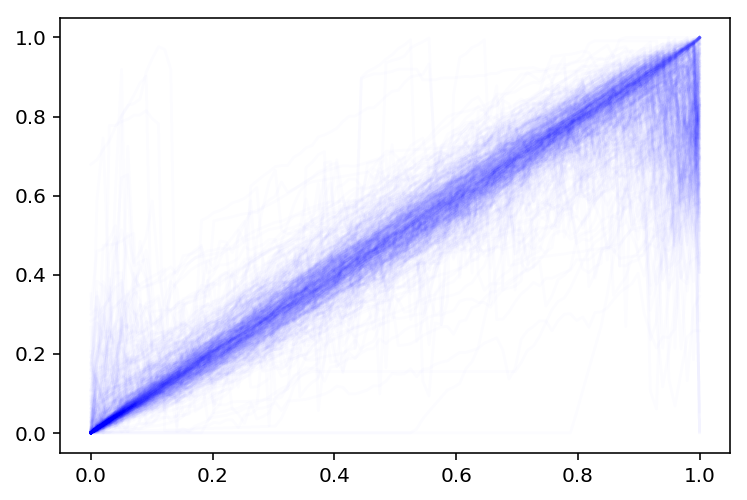

In [69]:
for i in range(len(poslstavgmat)):
    plt.plot(np.linspace(0, 1, num = 100),poslstavgmat[i,:], color='b', alpha=0.01)